In [ ]:
!wget https://archive.ics.uci.edu/static/public/879/ajwa+or+medjool.zip

--2025-03-31 12:54:24--  https://archive.ics.uci.edu/static/public/879/ajwa+or+medjool.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘ajwa+or+medjool.zip’

ajwa+or+medjool.zip     [         <=>        ] 297.52M  2.34MB/s    in 2m 19s  

2025-03-31 12:56:43 (2.14 MB/s) - ‘ajwa+or+medjool.zip’ saved [311976384]



In [ ]:
!unzip ajwa+or+medjool.zip

Archive:  ajwa+or+medjool.zip
   creating: ajwa+or+medjool/
  inflating: __MACOSX/._ajwa+or+medjool  
  inflating: ajwa+or+medjool/.DS_Store  
  inflating: __MACOSX/ajwa+or+medjool/._.DS_Store  
  inflating: ajwa+or+medjool/Embedded images - Inception V3.csv  
  inflating: __MACOSX/ajwa+or+medjool/._Embedded images - Inception V3.csv  
   creating: ajwa+or+medjool/Ajwa/
  inflating: __MACOSX/ajwa+or+medjool/._Ajwa  
  inflating: ajwa+or+medjool/Embedded images - Vgg-16.csv  
  inflating: __MACOSX/ajwa+or+medjool/._Embedded images - Vgg-16.csv  
  inflating: ajwa+or+medjool/Embedded images - SqueezNet.csv  
  inflating: __MACOSX/ajwa+or+medjool/._Embedded images - SqueezNet.csv  
  inflating: ajwa+or+medjool/README.md  
  inflating: __MACOSX/ajwa+or+medjool/._README.md  
  inflating: ajwa+or+medjool/Embedded images - Vgg-19.csv  
  inflating: __MACOSX/ajwa+or+medjool/._Embedded images - Vgg-19.csv  
  inflating: ajwa+or+medjool/AjwaOrMejdool.csv  
  inflating: __MACOSX/ajwa+or+medjool/.

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
import glob
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
base_dir = 'ajwa+or+medjool'  # Update this path

# Get the list of only .jpg files from the 'Ajwa_dates' and 'Mejool_dates' subfolders
ajwa_jpg_images = glob.glob(os.path.join(base_dir, 'Ajwa', '*.jpg'))
mejool_jpg_images = glob.glob(os.path.join(base_dir, 'Medjool', '*.jpg'))

In [ ]:
def create_dataset(image_paths, label):
    images = []
    labels = []
    for image_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
        labels.append(label)

    # Convert to a TensorFlow dataset
    images = tf.convert_to_tensor(images)
    labels = tf.convert_to_tensor(labels)

    return images, labels

# Load Ajwa and Mejool images separately
ajwa_images, ajwa_labels = create_dataset(ajwa_jpg_images, 0)  # 0 for Ajwa
mejool_images, mejool_labels = create_dataset(mejool_jpg_images, 1)  # 1 for Mejool

# Combine Ajwa and Mejool images
images = tf.concat([ajwa_images, mejool_images], axis=0)
labels = tf.concat([ajwa_labels, mejool_labels], axis=0)

# Shuffle the dataset
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset = dataset.shuffle(buffer_size=1000).batch(32)

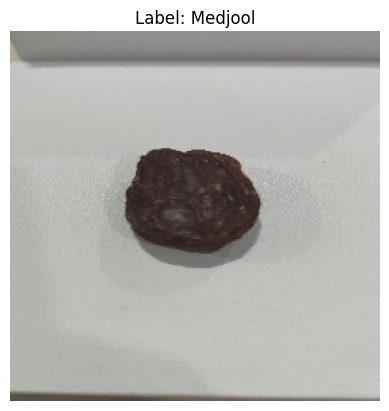

In [ ]:
# Get a batch of images (we will show the first image in the first batch)
for img_batch, label_batch in dataset.take(1):
    # img_batch is a batch of images (shape: [batch_size, height, width, channels])
    # label_batch is the corresponding batch of labels

    # Take the first image from the batch
    img = img_batch[0].numpy()  # Convert the image tensor to a numpy array
    label = label_batch[0].numpy()  # Convert the label tensor to a numpy array

    # Convert the image from [0, 255] to [0, 1]
    img = np.uint8(img)

    # Plot the image using matplotlib
    plt.imshow(img)
    plt.title("Label: " + ("Ajwa" if label == 0 else "Medjool"))
    plt.axis('off')  # Hide the axis
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and validation sets (80% for training, 20% for validation)
train_images, val_images, train_labels, val_labels = train_test_split(images.numpy(), labels.numpy(), test_size=0.2, random_state=42)

# Convert back to TensorFlow tensors
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(1000).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(32)


In [ ]:
# Define your CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes: Ajwa and Mejool
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 8s/step - accuracy: 0.5602 - loss: 834.3218 - val_accuracy: 0.6000 - val_loss: 16.9734
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.5328 - loss: 89.8924 - val_accuracy: 0.4000 - val_loss: 49.8130
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.3750 - loss: 38.5028 - val_accuracy: 0.4000 - val_loss: 9.5754
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.5125 - loss: 6.7772 - val_accuracy: 0.9500 - val_loss: 0.3204
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8086 - loss: 0.9900 - val_accuracy: 0.6000 - val_loss: 5.0889
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4773 - loss: 6.0088 - val_accuracy: 0.4000 - val_loss: 5.0973
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5016 - loss: 3.7389 - val_accuracy: 0.6000 - val_loss: 3.7910
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.5961 - loss: 2.7862 - val_accuracy: 0.4500 - val_loss: 1.8804
Ep

In [ ]:
model.save('Date_Model.h5')


In [ ]:
# Load the saved model
model = tf.keras.models.load_model('Date_Mode.h5')

# Load a new .jpg image to classify
img = tf.keras.preprocessing.image.load_img('ajwa+or+medjool/Ajwa/1665224234344.jpg', target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Predict the class
predictions = model.predict(img_array)
predicted_class = 'Ajwa' if predictions[0][0] > predictions[0][1] else 'Mejool'

print(f'The predicted class is: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
The predicted class is: Ajwa
